In [146]:

using Jacobi
using PyPlot
using DataFrames
#using Interact
include("../../HPFEM.jl/src/HPFEM.jl")
include("../src/HPFEM_mod.jl")


lagrange_oed_spec (generic function with 5 methods)

# Edo
   $$ y'' + y = (1 + 4 (k \pi)^2)sin(2 k \pi x) \\
y(-1) = y(1) = 0$$

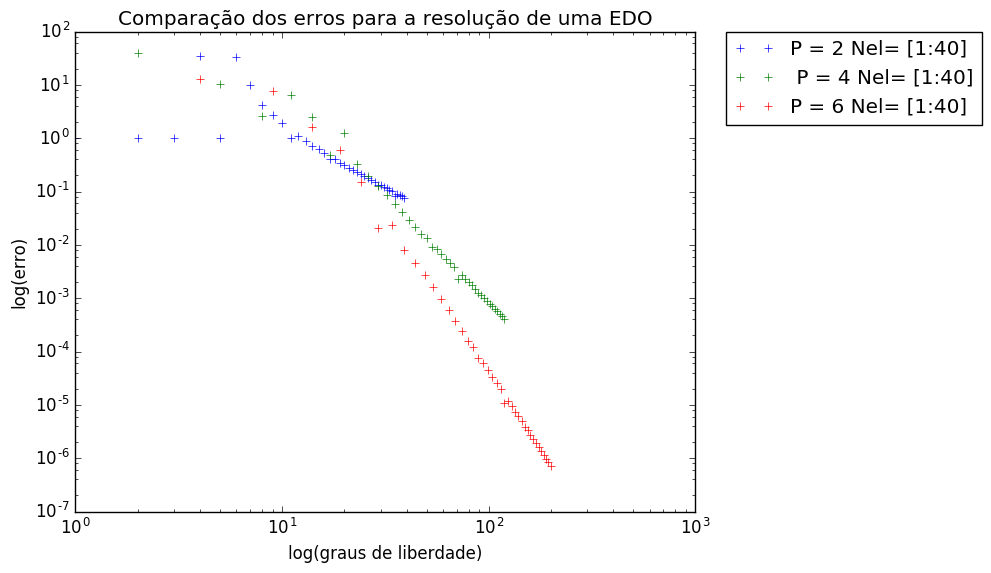

PyObject <matplotlib.legend.Legend object at 0x7faa870d6410>

In [168]:
k = 3
Q_max = M_max = 50
nel_max = 40


fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
resp(x) = sin(2*k*pi*x)

EMM =DataFrame(erro = Float64[], dof =  Float64[])
EM2 =DataFrame(erro = Float64[], dof =  Float64[])
for M = 3:M_max
    temp = lagrange_oed_spec(M,M,1,fun,resp)
    push!(EMM,temp)

    temp = lagrange_oed_spec(M,M,5,fun,resp)
    push!(EM2,temp)
end
EMe2 =DataFrame(erro = Float64[], dof =  Float64[])
EMe3 =DataFrame(erro = Float64[], dof =  Float64[])
EMe = DataFrame(erro = Float64[], dof =  Float64[])
for nel = 1:nel_max
    temp = lagrange_oed_spec(4,4,nel,fun,resp)
    push!(EMe,temp)

    temp = lagrange_oed_spec(2,2,nel,fun,resp)
    push!(EMe2,temp)

    temp = lagrange_oed_spec(6,6,nel,fun,resp)
    push!(EMe3,temp)
end    
loglog(EMe2[:dof],EMe2[:erro],"+",label = "P = 2 Nel= [1:$nel_max]")
loglog(EMe[:dof],EMe[:erro],"+",label = " P = 4 Nel= [1:$nel_max]")
loglog(EMe3[:dof],EMe3[:erro],"+",label = "P = 6 Nel= [1:$nel_max]")


#semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = [1:$M_max] Nel= 1")
#semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
#title("K = $k")



title("Comparação dos erros para a resolução de uma EDO")
xlabel("log(graus de liberdade)")
ylabel("log(erro)")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


In [163]:
l = [EMe2[1:15,:],EMe[1:15,:],EMe3[1:15,:]]



3-element Array{DataFrames.DataFrame,1}:
 15×2 DataFrames.DataFrame
│ Row │ erro     │ dof  │
├─────┼──────────┼──────┤
│ 1   │ 0.998027 │ 0.0  │
│ 2   │ 1.0      │ 1.0  │
│ 3   │ 0.998027 │ 2.0  │
│ 4   │ 1.0      │ 3.0  │
│ 5   │ 34.211   │ 4.0  │
│ 6   │ 1.0      │ 5.0  │
│ 7   │ 32.9996  │ 6.0  │
│ 8   │ 9.79714  │ 7.0  │
│ 9   │ 4.13106  │ 8.0  │
│ 10  │ 2.7544   │ 9.0  │
│ 11  │ 1.96025  │ 10.0 │
│ 12  │ 1.0      │ 11.0 │
│ 13  │ 1.11842  │ 12.0 │
│ 14  │ 0.879753 │ 13.0 │
│ 15  │ 0.705878 │ 14.0 │                                                   
 15×2 DataFrames.DataFrame
│ Row │ erro      │ dof  │
├─────┼───────────┼──────┤
│ 1   │ 38.8223   │ 2.0  │
│ 2   │ 10.4536   │ 5.0  │
│ 3   │ 2.64113   │ 8.0  │
│ 4   │ 6.55379   │ 11.0 │
│ 5   │ 2.47685   │ 14.0 │
│ 6   │ 0.486293  │ 17.0 │
│ 7   │ 1.26087   │ 20.0 │
│ 8   │ 0.321233  │ 23.0 │
│ 9   │ 0.196498  │ 26.0 │
│ 10  │ 0.127204  │ 29.0 │
│ 11  │ 0.0850274 │ 32.0 │
│ 12  │ 0.0583544 │ 35.0 │
│ 13  │ 0.040949  │ 38.0 │
│ 14  │

In [164]:
using Formatting
erro = [format(EMe[i,1],precision=4) for i in 1:15]
erro =  map(x->parse(Float64,x),erro)
glib   =EMe[1:15,2]
M4 = DataFrame(erro = erro, graus = glib)
####
erro = [format(EMe2[i,1],precision=4) for i in 1:15]
erro =  map(x->parse(Float64,x),erro)
glib   =EMe2[1:15,2]
M2 = DataFrame(erro = erro, graus = glib)
####
erro = [format(EMe3[i,1],precision=4) for i in 1:15]
erro =  map(x->parse(Float64,x),erro)
glib   =EMe3[1:15,2]
M3 = DataFrame(erro = erro, graus = glib)
writetable("M2.csv", M2)

writetable("M4.csv", M4)

writetable("M6.csv", M3)

In [150]:
convert(Float64,"1.1")

LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{Float64}, ::ASCIIString)
This may have arisen from a call to the constructor Float64(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert(::Type{Float64}, !Matched::Int8)
  convert(::Type{Float64}, !Matched::Int16)
  ...
while loading In[150], in expression starting on line 1

In [151]:
EMe[1,1]

38.82229692956205

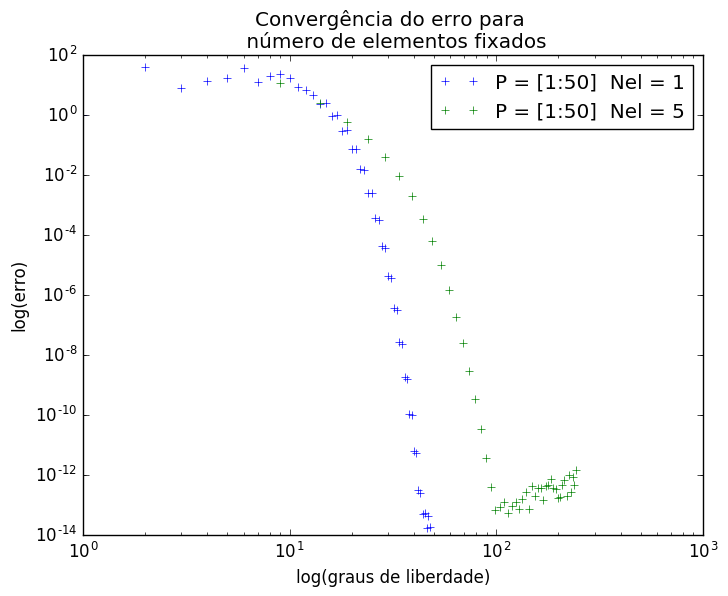

PyObject <matplotlib.legend.Legend object at 0x7faa86b3ebd0>

In [169]:
title("Convergência do erro para \n número de elementos fixados")
loglog(EMM[:dof],EMM[:erro],"+",label = "P = [1:$M_max]  Nel = 1")
loglog(EM2[:dof],EM2[:erro],"+",label = "P = [1:$M_max]  Nel = 5")
xlabel("log(graus de liberdade)")
ylabel("log(erro)")
legend()

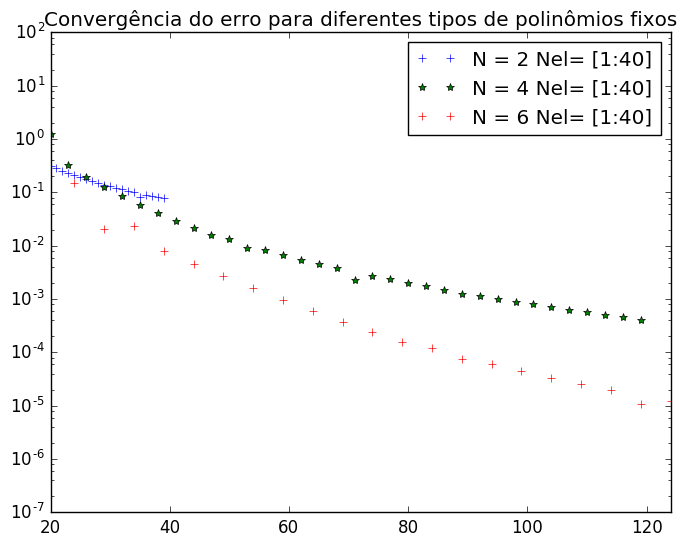

PyObject <matplotlib.text.Text object at 0x7faa87c6cb10>

In [153]:
semilogy(EMe2[:dof],EMe2[:erro],"+",label = "N = 2 Nel= [1:$nel_max]")
semilogy(EMe[:dof],EMe[:erro],"*",label = "N = 4 Nel= [1:$nel_max]")
semilogy(EMe3[:dof],EMe3[:erro],"+",label = "N = 6 Nel= [1:$nel_max]")
xlim([20,124])
legend()
title("Convergência do erro para diferentes tipos de polinômios fixos")

 l = figure(2)
Q_max = M_max = 100
nel_max = 50
@manipulate for Q= 1:1:Q_max,M=1:1:M_max, nel=1:1:nel_max; withfig(l) do
        fun(x) = (1 + 4*(k*pi)^2)*sin(2*k*pi*x)
        resp(x) = sin(2*k*pi*x)
        if Q < M
            Q=M
        end
        subplot(211)
        erro = lagrange_oed_plot(M,Q,nel,fun,resp)
        dof = lagrange_oed_spec(M,Q,nel,fun,resp)
        

        subplot(212)
        
        semilogy(EMe2[:dof],EMe2[:erro],"+",label = "M =Q = 2 Nel= [1:$nel_max]")
        semilogy(EMe[:dof],EMe[:erro],"+",label = "M =Q = 4 Nel= [1:$nel_max]")
        semilogy(EMe3[:dof],EMe3[:erro],"+",label = "M =Q = 6 Nel= [1:$nel_max]")
        semilogy(EMM[:dof],EMM[:erro],"+",label = "Q = M  Nel= 1")
        semilogy(EM2[:dof],EM2[:erro],"+",label = "Q = M  Nel = 5")
        
        PyPlot.axhline(dof[1])
        PyPlot.axvline(dof[2])
        legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    end
end

In [154]:
nel = 10
M = 10
Q = M
tempo =  UInt64[0]
for M in 3:M_max
    tic()
    erro = lagrange_oed_spec(M,Q+1,nel,fun,resp)
    t = toc()
    tempo = [tempo, t]
end
tempo


elapsed time: 0.000382048 seconds
elapsed time: 0.000255537 seconds
elapsed time: 0.000250145 seconds
elapsed time: 0.000259986 seconds
elapsed time: 0.000266505 seconds
elapsed time: 0.000284816 seconds
elapsed time: 0.000304408 seconds
elapsed time: 0.000322788 seconds
elapsed time: 0.000356744 seconds
elapsed time: 0.000600316 seconds
elapsed time: 0.000698799 seconds


LoadError: LoadError: Base.LinAlg.PosDefException(12)
while loading In[154], in expression starting on line 5

In [155]:
nel = 10
M = 10
Q = M
tempo1 = UInt64[0]
nel = 10
for M in 3:100
    Q = M ;
    tic();
    lagrange_oed_spec(M,Q,nel,fun,resp);
    t = toc();
    tempo1 = [tempo1 t];
end;


elapsed time: 0.007200389 seconds
elapsed time: 0.000395559 seconds
elapsed time: 0.00031186 seconds
elapsed time: 0.000331726 seconds
elapsed time: 0.001211319 seconds
elapsed time: 0.000700926 seconds
elapsed time: 0.00074986 seconds
elapsed time: 0.00053498 seconds
elapsed time: 0.000582129 seconds
elapsed time: 0.011859227 seconds
elapsed time: 0.005342136 seconds
elapsed time: 0.000911778 seconds
elapsed time: 0.004656245 seconds
elapsed time: 0.008753907 seconds
elapsed time: 0.001779945 seconds
elapsed time: 0.001875652 seconds
elapsed time: 0.007394476 seconds
elapsed time: 0.001736408 seconds
elapsed time: 0.00173672 seconds
elapsed time: 0.001868296 seconds
elapsed time: 0.002049466 seconds
elapsed time: 0.002230922 seconds
elapsed time: 0.002665861 seconds
elapsed time: 0.002650421 seconds
elapsed time: 0.002898918 seconds
elapsed time: 0.02111127 seconds
elapsed time: 0.004937261 seconds
elapsed time: 0.003794747 seconds
elapsed time: 0.004106548 seconds
elapsed time: 0.007

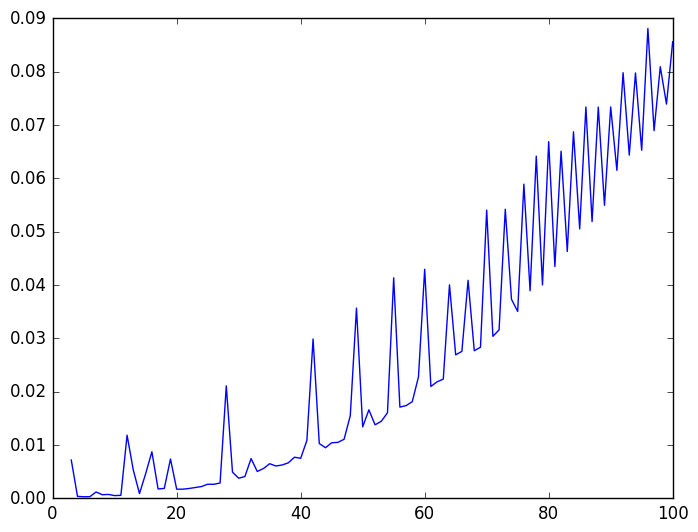

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7faa87a1dcd0>

In [156]:
plot(3:100,tempo1[2:end])

In [157]:
nel = 10
M = 10
Q = M
tempo2 = UInt64[0]

for nel in 3:nel_max
    Q = M =10
    tic()
    lagrange_oed_spec(M,Q,nel,fun,resp)
    t = toc()
    tempo2 = [tempo2 t]
end
plot(3:nel_max,tempo[2:end])

elapsed time: 0.000443247 seconds
elapsed time: 0.000365812 seconds
elapsed time: 0.000373992 seconds
elapsed time: 0.000395867 seconds
elapsed time: 0.000414073 seconds
elapsed time: 0.000447966 seconds
elapsed time: 0.000493771 seconds
elapsed time: 0.000516862 seconds
elapsed time: 0.000532486 seconds
elapsed time: 0.000563832 seconds
elapsed time: 0.000571199 seconds
elapsed time: 0.00059814 seconds
elapsed time: 0.000627812 seconds
elapsed time: 0.000650063 seconds
elapsed time: 0.000689475 seconds
elapsed time: 0.000726684 seconds
elapsed time: 0.000831843 seconds
elapsed time: 0.000842345 seconds
elapsed time: 0.000828764 seconds
elapsed time: 0.000933161 seconds
elapsed time: 0.000961186 seconds
elapsed time: 0.000955938 seconds
elapsed time: 0.00101267 seconds
elapsed time: 0.000993777 seconds
elapsed time: 0.003205221 seconds
elapsed time: 0.001178878 seconds
elapsed time: 0.00110524 seconds
elapsed time: 0.001079727 seconds
elapsed time: 0.001089966 seconds
elapsed time: 0.0

LoadError: LoadError: PyError (:PyObject_Call) <type 'exceptions.ValueError'>
ValueError(u'x and y must have same first dimension',)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/pyplot.py", line 3154, in plot
    ret = ax.plot(*args, **kwargs)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/__init__.py", line 1812, in inner
    return func(ax, *args, **kwargs)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_axes.py", line 1424, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 386, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 364, in _plot_args
    x, y = self._xy_from_xy(x, y)
  File "/home/augusto/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/axes/_base.py", line 223, in _xy_from_xy
    raise ValueError("x and y must have same first dimension")

while loading In[157], in expression starting on line 13

In [158]:
t = [0 t]

LoadError: LoadError: UndefVarError: t not defined
while loading In[158], in expression starting on line 1